In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [107]:
startup = pd.read_csv("beauty.csv")
startup.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [108]:
print(f'Columns: {startup.columns}')

Columns: Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')


In [109]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [110]:
startup.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


## ets take at first the relationship between marketing spend VS profit

In [111]:
X = startup['wage'].values

In [112]:
y = startup['exper'].values

In [113]:
X = X.reshape(-1,1)

In [114]:
X

array([[5.73],
       [4.28],
       [7.96],
       ...,
       [3.29],
       [2.31],
       [1.92]])

In [115]:

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,)

In [116]:

x_train.shape # 80% of X data

(1008, 1)

In [117]:

x_test.shape # 20% of X data

(252, 1)

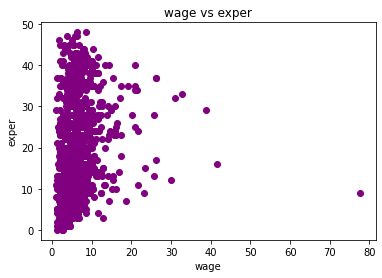

In [118]:

%matplotlib inline
plt.scatter(x_train, y_train, color="purple")
plt.xlabel('wage')
plt.ylabel('exper')
plt.title('wage vs exper')
plt.show()

Let's create the model and train it

In [119]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Now testing:

In [120]:
y_predict = model.predict(x_test)

In [121]:

y_test # The leftover testing data for y

array([22, 19,  4, 12, 28, 40, 20, 34,  8, 17, 20,  7,  4,  7, 11, 36, 30,
       15, 10,  3, 42, 13,  2, 14, 14, 19, 25,  9,  3,  6, 44, 18,  3, 20,
       15, 36,  6, 28, 11, 11,  2, 23,  4,  7,  6, 44,  0, 20, 22,  4, 11,
        7, 26, 12,  5, 42,  8, 12, 25, 15, 36,  8, 10, 12, 20, 18, 19,  9,
       40, 27, 17, 26,  6, 17,  3, 15, 18, 28,  9, 10, 42, 12, 10, 19, 23,
       10, 15,  4, 44, 10,  6, 22, 10, 30,  7, 25, 14, 40, 14,  8, 24,  3,
        3, 18,  7, 32,  2, 20, 34,  8, 11, 12, 19, 26, 29, 44,  4,  7, 40,
       42,  5,  6, 35, 35, 25, 29, 33, 18, 16, 14, 15, 36, 18,  8,  9, 20,
       15, 27, 40,  5, 16, 29, 32, 39,  5,  8, 19, 25, 27,  6, 21,  2, 24,
       28, 18, 44, 38, 42, 33, 20,  9, 18,  1, 21, 22,  8, 12,  7,  3, 13,
        9,  7, 18, 14, 15, 42, 12, 31, 18,  9, 10, 12, 24, 20, 15, 12, 15,
       33, 19, 13, 26, 26,  1, 44, 38, 23,  4, 12,  7, 44, 24,  8, 18, 40,
        5, 20, 28,  8, 24,  8, 17, 12,  3, 10, 12, 29,  2,  4,  2, 13, 44,
        9, 10,  8,  3, 15


## given a new value for the marketing spend, what is the predicted profit ?

In [122]:

new_mark_spend = np.array([300000]).reshape(-1,1)
new_mark_spend

array([[300000]])

In [123]:
model.predict(new_mark_spend) # Predicted the profit if the marketing spend is 300,000

array([164481.60604386])


## Accuracy of model

In [124]:
model.score(x_train, y_train)*100 ## this is the train accuracy

4.813815771830409

In [125]:
model.score(x_test, y_test)*100 ## this is the test accuracy

8.083245538820272


## Now Plotting the predicted output vs. the test output

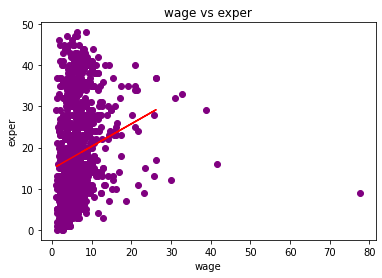

In [126]:

%matplotlib inline
plt.scatter(x_train, y_train, color="purple")
plt.plot(x_test, y_predict, color='red')
plt.xlabel('wage')
plt.ylabel('exper')
plt.title('wage vs exper')
plt.show()

In [127]:
predicted = model.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
df

,Actual,Predicted
0,22,19.020671
1,19,19.826558
2,4,15.890319
3,12,16.860674
4,28,19.755289
...,...,...
247,22,19.256407
248,30,19.305747
249,3,16.696207
250,34,17.090927


## Conclusions:

* The more wage, the more experience
* the increment is non linear as we see in the diagram
* Test accuracy is about -1 % while train accuracy is about 7 %